## Problem Statement:

Given a data set of grey scale image of handwritten digits of 0 and 1, we will use a neural network to recognize two handwritten digits, zero and one. This is a binary classification task. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. 

This exercise will show you how the methods you have learned can be used for this classification task.


### 2.2 Dataset

You will start by loading the dataset for this task. 
- The `load_data()` function shown below loads the data into variables `X` and `y`


- The data set contains 1000 training examples of handwritten digits $^1$, here limited to zero and one.  

    - Each training example is a 20-pixel x 20-pixel grayscale image of the digit. 
        - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location. 
        - The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. 
        - Each training example becomes a single row in our data matrix `X`. 
        - This gives us a 1000 x 400 matrix `X` where every row is a training example of a handwritten digit image.

$$X = 
\left(\begin{array}{cc} 
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\ 
--- (x^{(m)}) --- 
\end{array}\right)$$ 

- The second part of the training set is a 1000 x 1 dimensional vector `y` that contains labels for the training set
    - `y = 0` if the image is of the digit `0`, `y = 1` if the image is of the digit `1`.

$^1$<sub> This is a subset of the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)</sub>

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input


In [8]:
## We need to define the function to read from numpy array 
def load_data():
    X = np.load("data\\X.npy")
    print(X)
    Y = np.load("data\\y.npy")
    print(Y)
    print("shape of X = {0}, shape of y = {1} ".format(X.shape, Y.shape))## Sahpe is 5K, we will take 0 to 999 for the 0,1 numbers
    
    return (X[0:1000],Y[0:1000])
X_train, Y_train = load_data()
    

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0]
 [0]
 [0]
 ...
 [9]
 [9]
 [9]]
shape of X = (5000, 400), shape of y = (5000, 1) 


In [10]:
## let us print X[670] and see the values
print("Value of X[670] is = {0}".format(X_train[670]))

Value of X[670] is = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.

In [14]:
print("Shape of X = {1} y = {0}".format(Y_train.shape, X_train.shape))

Shape of X = (1000, 400) y = (1000, 1)


In [13]:
print("Value of y[670] is = {0}".format(Y_train[670]))

Value of y[670] is = [1]


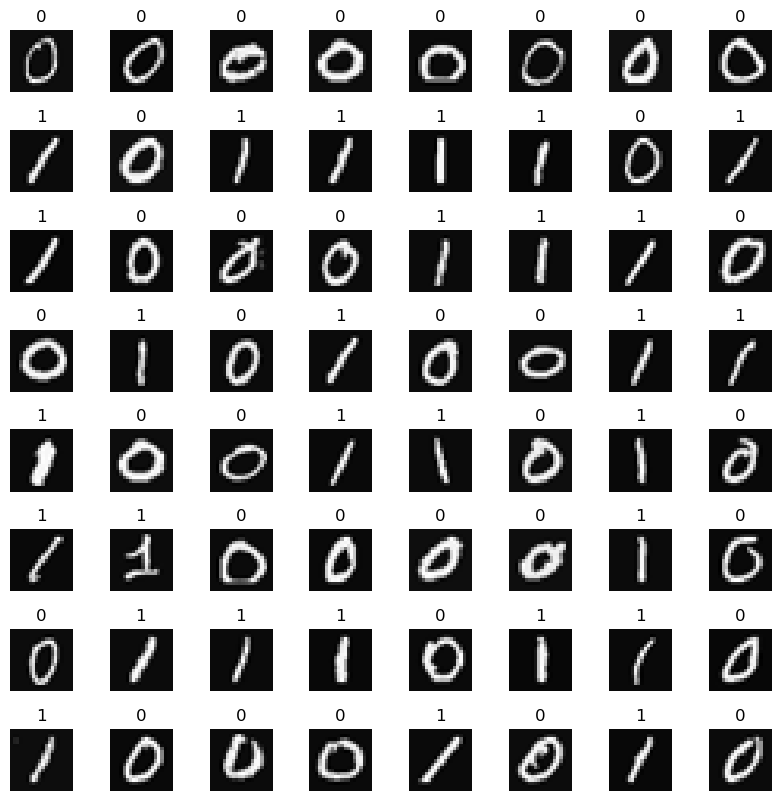

In [21]:
import matplotlib.pyplot as plt

## get shape of X
m,n = X_train.shape

## get a figure with 8 

fig,axes = plt.subplots(8,8,figsize=(8,8))
fig.tight_layout(pad=0.1)
for i,ax in enumerate(axes.flat):
    ## Get a random example from X and display it
    x_random_index = np.random.randint(m)
    
    x = X_train[x_random_index].reshape(20,20).T
    ax.imshow(x, cmap = 'gray')
    ax.set_title(Y_train[x_random_index,0])
    ax.set_axis_off()
    
    

### 2.3 Model representation

The neural network you will use  
- This has three dense layers with sigmoid activations. First layer with 25, second layer with 15 and thrid layer with 1 neuron respectively
    - Inputs are pixel values of digit images.
    - Since the images are of size $20\times20$, this gives us $400$ inputs  

- The parameters have dimensions that are sized for a neural network with $25$ units in layer 1, $15$ units in layer 2 and $1$ output unit in layer 3. 

    - Dimensions of these parameters are determined as follows:
        - If network has $s_{in}$ units in a layer and $s_{out}$ units in the next layer, then 
            - $W$ will be of dimension $s_{in} \times s_{out}$.
            - $b$ will a vector with $s_{out}$ elements
  
    - Therefore, the shapes of `W`, and `b`,  are 
        - layer1: The shape of `W1` is (400, 25) and the shape of `b1` is (25,)
        - layer2: The shape of `W2` is (25, 15) and the shape of `b2` is: (15,)
        - layer3: The shape of `W3` is (15, 1) and the shape of `b3` is: (1,)
>**Note:** The bias vector `b` could be represented as a 1-D (n,) or 2-D (n,1) array. Tensorflow utilizes a 1-D representation and this lab will maintain that convention. 

In [23]:
## Tensor flow model
model = Sequential(
[
    Input(shape=(400,)),
    Dense(25,activation='sigmoid'),
    Dense(15,activation='sigmoid'),
    Dense(1,activation='sigmoid')
    
], name = "zero_one_classifier")

In [26]:
model.summary()

Model: "zero_one_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                10025     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


In [27]:
L1_num_params = 400 * 25 + 25  # W1 parameters  + b1 parameters
L2_num_params = 25 * 15 + 15   # W2 parameters  + b2 parameters
L3_num_params = 15 * 1 + 1     # W3 parameters  + b3 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params )

L1 params =  10025 , L2 params =  390 ,  L3 params =  16


In [28]:
[layer1, layer2, layer3] = model.layers

In [30]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


In [31]:
## We can get the weight using get_weights() method or weights variable

W3,b3 = model.layers[2].get_weights()
print(W3)
print(b3)

[[ 0.1278773 ]
 [ 0.07962281]
 [ 0.09075671]
 [ 0.10965461]
 [-0.06562495]
 [ 0.23919338]
 [-0.01097882]
 [ 0.47313148]
 [ 0.13448995]
 [-0.08405775]
 [ 0.05224997]
 [-0.57024854]
 [ 0.18277776]
 [ 0.05913448]
 [-0.18256006]]
[0.]


In [37]:
## Define the loss funciton and optimizer
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.01)
)

In [38]:
## Fit the model
model.fit(X_train, Y_train,epochs=20)

Epoch 1/20
32/32 [==============================] - 1s 2ms/step - loss: 0.3770
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0596
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0264
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0175
Epoch 5/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0142
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0111
Epoch 8/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0103
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0093
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0080
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 13/20
32/32 [==============================

In [39]:
## Checking prediction

prediction = model.predict(X_train[0].reshape(1,400))
print(prediction)

1/1 [==============================] - 0s 59ms/step
[[0.00138731]]


In [40]:
if prediction > 0.5:
    print(1)
else:
    print(0)

0


1/1 [==============================] - 0s 31ms/step


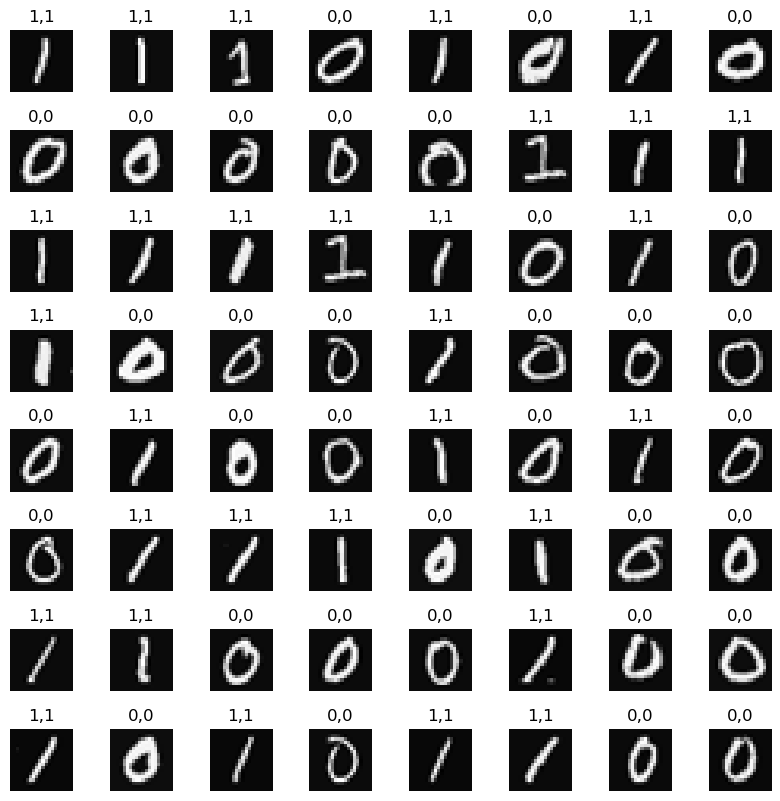

In [45]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
## Visualize the output for randomly selected 
import matplotlib.pyplot as plt

## get shape of X
m,n = X_train.shape

## get a figure with 8 

fig,axes = plt.subplots(8,8,figsize=(8,8))
fig.tight_layout(pad=0.1)
for i,ax in enumerate(axes.flat):
    ## Get a random example from X and display it
    x_random_index = np.random.randint(m)
    
    x = X_train[x_random_index].reshape(20,20).T
    ax.imshow(x, cmap = 'gray')
    
    prediction = model.predict(X_train[x_random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    
    ax.set_title(f"{Y_train[x_random_index,0]},{yhat}")
    ax.set_axis_off()

IndexError: list index out of range